# ***5 probability and statistics A/B testing***
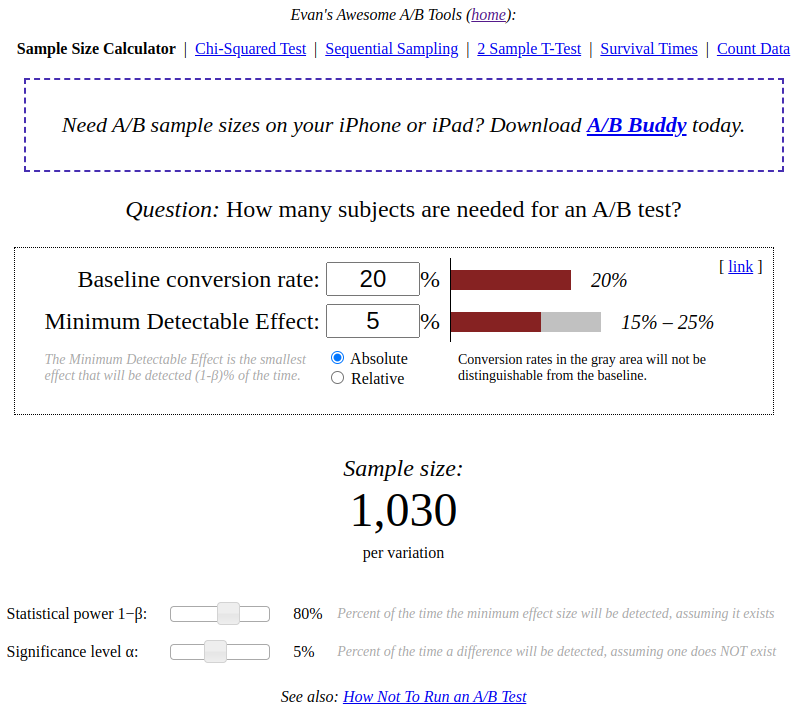

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
mde = 0.05
baseline = 0.2
sample_size = 1030

# **Now we can use:**
 * Fisher exact test
 * z test
 * T test
 * Chi square test
 * Bootstrap (Monte-Carlo)



In [ ]:
from statsmodels.stats.proportion import proportions_ztest

### H0: Have not difference between groups == samples cаme from the same distribution



## **Z - test**

In [ ]:
result = []
for _ in range(10000):
  a = np.random.binomial(1, baseline, size=sample_size)
  b = np.random.binomial(1, baseline+mde, size=sample_size)
  _, pval = proportions_ztest([a.sum(), b.sum()], [len(a), len(b)])
  result.append(pval)

In [ ]:
t = pd.Series(result)

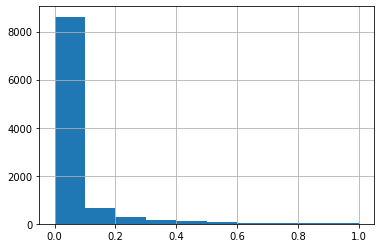

In [ ]:
t.hist()

In [ ]:
(t < 0.05).mean()

0.7805

## **T - test**

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
result = []
for _ in range(10000):
  a = np.random.binomial(1, baseline, size=sample_size)
  b = np.random.binomial(1, baseline+mde, size=sample_size)
  _, pval = ttest_ind(a, b, equal_var=False)
  result.append(pval)

In [ ]:
t = pd.Series(result)

In [ ]:
(t < 0.05).mean()

0.7841

## **aa test**

In [ ]:
result = []
for _ in range(10000):
  a = np.random.binomial(1, baseline, size=sample_size)
  b = np.random.binomial(1, baseline, size=sample_size)
  _, pval = ttest_ind(a, b, equal_var=False)
  result.append(pval)

In [ ]:
t = pd.Series(result)

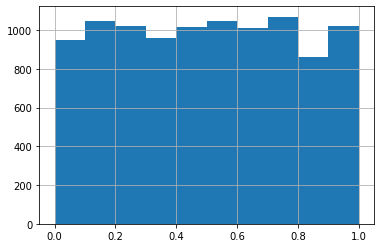

In [ ]:
t.hist()

In [ ]:
import seaborn as sns

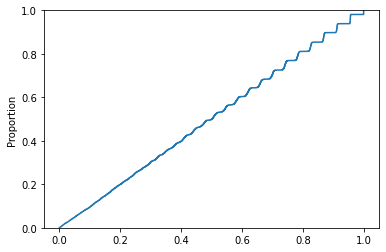

In [ ]:
sns.ecdfplot(t)

In [ ]:
(t < 0.05).mean()

0.0475

### **But in real projects we don't have the same samples, often they differ**

In [ ]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.20, 0.25)
sample_size = round(sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1))

In [ ]:
sample_size

1092

In [ ]:
result = []
for _ in range(10000):
  a = np.random.binomial(1, baseline, size=sample_size)
  b = np.random.binomial(1, baseline+mde, size=sample_size)
  _, pval = proportions_ztest([a.sum(), b.sum()], [len(a), len(b)])
  result.append(pval)

In [ ]:
t = pd.Series(result)

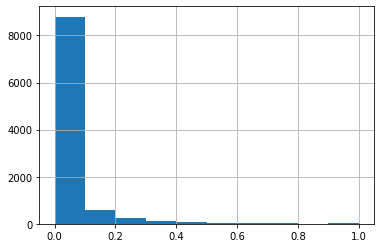

In [ ]:
t.hist()

In [ ]:
(t < 0.05).mean()

0.8035

## **Now we will use different samples**

In [ ]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.20, 0.25)
sample_size1 = round(sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1/3))

In [ ]:
sample_size1

2184

In [ ]:
sample_size2 = round(sample_size1 * 1/3)
sample_size2

728

In [ ]:
result = []
for _ in range(10000):
  a = np.random.binomial(1, baseline, size=sample_size1)
  b = np.random.binomial(1, baseline+mde, size=sample_size2)
  _, pval = proportions_ztest([a.sum(), b.sum()], [len(a), len(b)])
  result.append(pval)

In [ ]:
t = pd.Series(result)

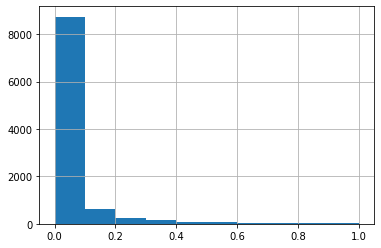

In [ ]:
t.hist()

In [ ]:
(t < 0.05).mean()

0.8005